In [1]:
## File to read in LRG catalog & matched Randoms sampe & to read out the clustering input files (ra,dec,z,cdist)
from __future__ import division
import numpy as np
import math
from astropy import units as u
from astropy.coordinates import SkyCoord, match_coordinates_sky
import astropy.coordinates as coord
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table
from astropy.io import fits
import time
from numpy.lib.recfunctions import append_fields
from kde import weighted_gaussian_kde
from astropy.cosmology import FlatLambdaCDM,Planck15
import sys
from time import gmtime, strftime

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [2]:
# Read in cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [3]:
## Running LRGs w/ bins to match peas Oct 2017
import clustering.projected_correlation_functions as w
import clustering.randoms as rand
from clustering.utils import wp_d1d2,wp_dd

In [4]:
LRG= Table.read('../cat/LRGzcat.fits')
LRGr=Table.read('../cat/LRGRandzcat.fits')

In [5]:
# 10/09/2017, running to match cross correlation functions
pimax=60
#bins = np.array([1,3,6,8,10,15,20,30,40,50,60])
# 10/13/2017, running to match cross correlation functions
bins = np.array([1,4,8,16,32,40,50,60,100])

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
rp,wp_p,wp_p_err_boot,cov_boot,wp_arr_boot = w.auto_wp(LRG, LRGr, bins, pimax, m=100,estimator='P',errtype='b')
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2017-10-19 20:16:27
beginning Bootstrap
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100
2017-10-29 09:39:16


In [6]:
np.save('output/rp_LRGrgt1.npy', rp)
np.save('output/wp_p_LRGrgt1',wp_p)
np.save('output/wp_p_err_LRGrgt1', wp_p_err_boot)
np.save('output/cov_LRGrgt1',cov_boot)
np.save('output/wp_arr_LRGrgt1',wp_arr_boot)

## Read in LRG files from Nikhil & create out file with values of interest (ra,dec,z,cdist)

In [3]:
# read in LRG files from Nikhil
tS = Table.read('../cat/galaxy_DR12v5_LOWZ_South.fits')
tN = Table.read('../cat/galaxy_DR12v5_LOWZ_North.fits')
#Append the 2 files together (North & Soutn)
LRGra=np.concatenate((tN['RA'],tS['RA']),0)
LRGdec=np.concatenate((tN['DEC'],tS['DEC']),0)
LRGz=np.concatenate((tN['Z'],tS['Z']),0)
#Make an array that contains only ra,dec&z, and select only those LRGs at z's of the peas
temp=list(zip(LRGra,LRGdec,LRGz))
LRG=np.zeros((len(LRGz),), dtype=[('ra', '<f8'),('dec', '<f8'),('z', '<f8')])
LRG[:] = temp
LRG = LRG[(LRG['z']>.112) & (LRG['z']<.36)]
print(len(LRG))

287751


In [7]:
#from astropy.io.fits import getheader
#hdr=getheader('../cat/galaxy_DR12v5_LOWZ_South.fits')

In [3]:
#print(hdr.names)

print(hdr)


In [5]:
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#Add new array field of comoving distances
cdists = np.array([cosmo.comoving_distance(z).value for z in LRG['z']])*cosmo.h
LRG = append_fields(LRG, 'cdist', cdists)
# append the field and make back into normal array
LRG=np.array(LRG)
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2017-07-05 13:41:58
2017-07-05 13:42:08


## b/f play this code runs

In [6]:
# read in LRG randoms files from BOSS survey (note takes a min to read int)
tS = Table.read('../cat/random0_DR12v5_LOWZ_South.fits')
tN = Table.read('../cat/random0_DR12v5_LOWZ_North.fits')

In [6]:
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#Append the 2 files together (North & Soutn) (Note takes a min to run)
LRGrar=np.concatenate((tN['RA'],tS['RA']),0)
LRGdecr=np.concatenate((tN['DEC'],tS['DEC']),0)
LRGzr=np.concatenate((tN['Z'],tS['Z']),0)
#Make an array that contains only ra,dec&z, and select only those LRGs at z's of the peas
temp=list(zip(LRGrar,LRGdecr,LRGzr))
LRGr=np.zeros((len(LRGzr),), dtype=[('ra', '<f8'),('dec', '<f8'),('z', '<f8')])
LRGr[:] = temp
LRGr = LRGr[(LRGr['z']>.112) & (LRGr['z']<.36)]
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))


2017-06-30 17:29:49
2017-06-30 17:29:59


In [7]:
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#Add new array field of comoving distances (note: takes a ~8-10 min to run)
cdists = np.array([cosmo.comoving_distance(z).value for z in LRGr['z']])*cosmo.h
LRGr = append_fields(LRGr, 'cdist', cdists)
# append the field and make back into normal array
LRGr=np.array(LRGr)
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2017-06-30 17:30:06
2017-06-30 17:38:22


In [25]:
## EDIT 6/30, let's keep it large for now to see what the result will be.
##Note - file needed be QUITE so large, what about making it smaller?
#sm=len(LRGr)/2
#if sm%2 == 1:
#    sm=sm+1
#sm=int(sm)
#ind = np.random.randint(len(LRGr), size=sm)
#LRGrsm=LRGr[ind]
#print(len(LRGr),len(LRGrsm))


14144530 7072266


(array([  246015.,   982128.,  1202692.,  1109257.,  1076572.,   821843.,
          535398.,   500412.,   406205.,   191744.]),
 array([-10.999796 ,  -3.0249004,   4.9499952,  12.9248908,  20.8997864,
         28.874682 ,  36.8495776,  44.8244732,  52.7993688,  60.7742644,
         68.74916  ]),
 <a list of 10 Patch objects>)

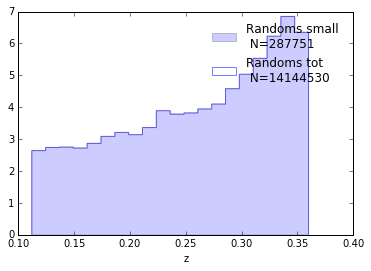

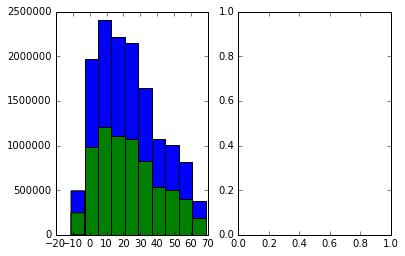

In [30]:
##check histograms
#nd = len(LRG)
#nr = len(LRGr)
#plt.hist(LRGrsm['z'], histtype='stepfilled', bins=20,alpha=0.2,color='b',weights=None,normed=True,\
#         label='Randoms small \n N='+str(nd))
#plt.hist(LRGr['z'], histtype='step', bins=20,alpha=0.5,normed=True,weights=None,\
#         label='Randoms tot\n N='+str(nr))
#plt.xlabel('z')
#plt.legend(loc='best', frameon=False)
#
##f,(ax1,ax2)=plt.subplots(1,2)
##ax1.hist(LRGr['dec'])
##ax1.hist(LRGrsm['dec'], )

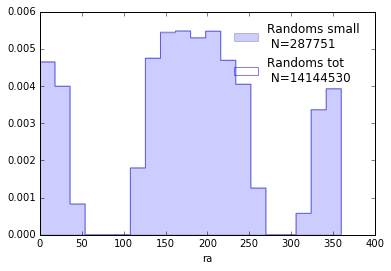

In [32]:
#plt.hist(LRGrsm['ra'], histtype='stepfilled', bins=20,alpha=0.2,color='b',weights=None,normed=True,\
#         label='Randoms small \n N='+str(nd))
#plt.hist(LRGr['ra'], histtype='step', bins=20,alpha=0.5,normed=True,weights=None,\
#         label='Randoms tot\n N='+str(nr))
#plt.xlabel('ra')
#plt.legend(loc='best', frameon=False)


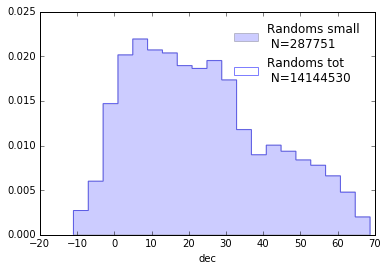

In [33]:
#plt.hist(LRGrsm['dec'], histtype='stepfilled', bins=20,alpha=0.2,color='b',weights=None,normed=True,\
#         label='Randoms small \n N='+str(nd))
#plt.hist(LRGr['dec'], histtype='step', bins=20,alpha=0.5,normed=True,weights=None,\
#         label='Randoms tot\n N='+str(nr))
#plt.xlabel('dec')
#plt.legend(loc='best', frameon=False)


In [39]:
#print(LRG.dtype.names)
#print(LRGr.dtype.names)
#print(LRGrsm.dtype.names)

### OUtput created catalogs, note not happy if they already exist
#t = Table(LRG)
#t.write('../cat/LRGzcat.fits',format='fits')
#tr = Table(LRGr)
#tr.write('../cat/LRGRandzcatfull.fits',format='fits')
#trsm = Table(LRGr)
#trsm.write('../cat/LRGRandzcat.fits',format='fits')

('ra', 'dec', 'z', 'cdist')
('ra', 'dec', 'z', 'cdist')
('ra', 'dec', 'z', 'cdist')


In [37]:
#print(len(LRGr)/len(LRG))
#print(len(LRGrsm)/len(LRG))

49.15545037202303
24.577728661238364


## Start here to use created LRG catalogs for correlation functions

In [3]:
LRG= Table.read('../cat/LRGzcat.fits')
LRGr=Table.read('../cat/LRGRandzcat.fits')

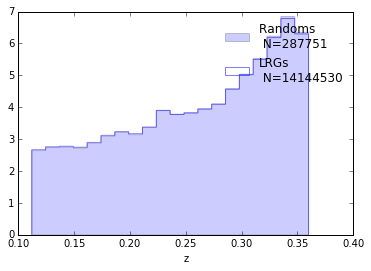

In [8]:
nd = len(LRG)
nr = len(LRGr)
plt.hist(LRGr['z'], histtype='stepfilled', bins=20,alpha=0.2,color='b',weights=None,normed=True,\
         label='Randoms \n N='+str(nd))
plt.hist(LRG['z'], histtype='step', bins=20,alpha=0.5,normed=True,weights=None,\
         label='LRGs\n N='+str(nr))
plt.xlabel('z')
plt.legend(loc='best', frameon=False)


In [ ]:
ra = coord.Angle(LRG['ra']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(LRG['dec']*u.degree)

rar = coord.Angle(LRGr['ra']*u.degree)
rar = rar.wrap_at(180*u.degree)
decr = coord.Angle(LRGr['dec']*u.degree)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="aitoff")

ax.scatter(rar.radian,decr.radian,1,color='k',alpha=.1)
ax.scatter(ra.radian, dec.radian,1,color='g',marker='+')
# blue is non-random default color used, black is randoms (k), reds r, cyan is c, green is g, points is transparent
# marker='o', '+', '*','.', 'x','square' or 's'	Square'diamond'or'd','^','v', '>', '<','pentagram' or 'p','hexagram' or 'h','none'
#plt.xlabel('RA')
#plt.xlabel('RA')
plt.title('LRG / Randoms')
plt.legend(loc='best', frameon=False)
plt.savefig('../plots/LRGrand_ra_dec.pdf')

/Users/ccardamone/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


## LRG AutoCorrelation - aka a basic check of autocorr funct program

In [4]:
import clustering.projected_correlation_functions as w
import clustering.randoms as rand
from clustering.utils import wp_d1d2,wp_dd

In [5]:
LRG= Table.read('../cat/LRGzcat.fits')
LRGr=Table.read('../cat/LRGRandzcat.fits')

In [5]:
## Initialize bins, $\pi_{max}$
# set out to 60 Mpc length, as a function of r_p, each scale is integrated from 0 to 60 Mpc
pimax=60
nbins = 10
bins = np.logspace(-1, np.log10(40), nbins + 1)

In [7]:
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#First line would call program inside projected_correlation_functions.py, 
#   which then calls wp_dd AND auto_jackknife, which calls wp_dd inside error.py a series of times with data block missing
#   this estimates the jackknife errors, and note rp is returned, where it is not in the second call
#LRGrp,LRGwp_p,LRGwp_p_err,LRGcov = w.auto_wp(LRG, LRGr, bins, pimax, m=20, estimator='L')
#LRGwp_p_noerr = wp_dd(LRG, LRGr, bins, pimax, estimator='L')
rpjack,wp_p_jack,wp_p_err_jack,cov_jack,wp_arr_jack = w.auto_wp(LRG, LRGr, bins, pimax, m=20, estimator='P',errtype='j')
rpboot,wp_p,wp_p_err_boot,cov_boot,wp_arr_boot = w.auto_wp(LRG, LRGr, bins, pimax, m=100, estimator='P',errtype='b')
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2017-07-24 19:04:56
beginning jackknifes
0 0 0 18.0 -90.0 -64.15806723683288
0 0 0 18.0 -64.15806723683288 -53.13010235415599
0 0 0 18.0 -53.13010235415599 -44.42700400080571
0 0 0 18.0 -44.42700400080571 -36.86989764584403
0 0 0 18.0 -36.86989764584403 -30.00000000000001
0 0 0 18.0 -30.00000000000001 -23.578178478201842
0 0 0 18.0 -23.578178478201842 -17.4576031237221
0 0 0 18.0 -17.4576031237221 -11.536959032815496
1267 59507 0 18.0 -11.536959032815496 -5.739170477266795
3357 172662 0 18.0 -5.739170477266795 -7.951386703658792e-15
3884 172131 0 18.0 -7.951386703658792e-15 5.739170477266779
3509 155934 0 18.0 5.739170477266779 11.53695903281548
3454 166326 0 18.0 11.53695903281548 17.457603123722084
3054 156890 0 18.0 17.457603123722084 23.578178478201824
3558 160425 0 18.0 23.578178478201824 29.999999999999993
2904 138650 0 18.0 29.999999999999993 36.86989764584401
0 0 0 18.0 36.86989764584401 44.427004000805695
0 0 0 18.0 44.427004000805695 53.130102354155966
0 0 0 18.0 53.130102354

TypeError: 'NoneType' object is not iterable

In [14]:
rp=np.array([  0.14102821,   0.25675091,   0.46743152,   0.85098909,1.54928027,   2.8205642 ,   5.13501822,   9.34863035, 17.01978177,  30.98560543])

In [ ]:
# 8/23/2017, running to match cross correlation functions
pimax=60
bins = np.array([1,3,6,8,10,15,20,30,40,50,60])
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
rp,wp_p,wp_p_err_boot,cov_boot,wp_arr_boot = w.auto_wp(LRG, LRGr, bins, pimax, m=100,estimator='P',errtype='b')

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2017-08-25 20:03:37


In [ ]:
np.save('output/rp_LRGauto_pi60.npy',rp)
np.save('output/wp_LRGauto_pi60.npy',wp_p)
np.save('output/wp_LRGauto_err_pi60.npy',wp_p_err)


In [ ]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
plt.scatter(rp,LRGwp_p)
#plt.legend(frameon=False)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$/$r_{p}$',fontsize=16)
plt.title('LRG ACF')

plt.savefig('../plots/AutoCorrFunctLRGs.pdf')

In [26]:
LRGwp_p

array([ 1026.17777937,   681.95715804,   379.20917454,   188.58986124,
         104.93445936,    68.33945071,    42.54954507,    24.3757939 ,
          12.65178423,     5.42466491])

In [ ]:
#Fit with a powerlaw to determine bias (using the autocorrelation of the LRGs)
# Gamma is a function from cosmology package (gamma is slope and r0 is amplitude)
##https://www.hindawi.com/journals/aa/2012/853701/
from scipy.special import gamma
def A(g):
    return gamma(1/2)*gamma((g-1)/2)/gamma(g/2) 
#y is model powerlaw given rp & 2 parameters of fit
def y(r,r0,g):
    return A(g)*(r0**g)*(r**(1.-g))


In [ ]:
## Now fit an actual curve to the data rp2 & wp two halo data
#sigerr=wp_p_err
##p0 is guesses

from scipy.optimize import curve_fit
plawfit=curve_fit(y,rp,wp_p,p0=[2,2])
r0=plawfit[0][0]
gam=plawfit[0][1]

# plug powerlaw fit and darkmatter sigma 8 value, find bias
def J(g):
    return 72/((3 - g)*(4 - g)*(6 - gam)*2*g)
sig_agn = np.sqrt(J(gam)*(r0/8)**gam)
sig_dm = (0.8)
bias = sig_agn/sig_dm

In [ ]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
yf_arr=[]
for r in rp2:
    yf_arr.append(y(r,r0,gam))
plt.errorbar(rp,wp_p,yerr=wp_p_err,fmt='.',color='k')
plt.plot(rp2,yf_arr,color='k')

In [1]:
#Ran the full matrix with Jackknife error, should take ~10 hours or so.
#LRGrp,LRGwp_p,LRGwp_p_err,LRGcov = w.auto_wp(LRG, LRGr, bins, pimax, m=20, estimator='L')
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#LRGrp,LRGwp_p,LRGwp_p_err,LRGcov = w.auto_wp(LRG, LRGr, bins, pimax, m=20, estimator='L')
#LRGwp_p = wp_dd(LRG, LRGr, bins, pimax, estimator='L')
#LRGrp,LRGwp,LRGwp_err,Mag = w.cross_wp(d1=peas, d2=LRG, r1=rzpea, r2=LRGr, bins=bins, pimax=pimax,m=5, estimator='L')
#LRGwp_p_noerrP = wp_dd(LRG, LRGr, bins, pimax, estimator='P')
#LRGwp_p_noerrL = wp_dd(LRG, LRGr, bins, pimax, estimator='L')
#LRGrp,LRGwp_p,LRGwp_err,cov = w.auto_wp(LRG, LRGr, bins, pimax, m=5, estimator='P')

#rp_LRGjack,wp_p_LRGjack,wp_p_err_LRGjack,cov_LRGjack,wp_arr_LRGjack = w.auto_wp(LRG, LRGr, bins, pimax, m=5, 
#                                                                 estimator='P',errtype='j')
#rp_LRGboot,wp_p_LRGboot,wp_p_err_LRGboot,cov_LRGboot,wp_arr_LRGboot = w.auto_wp(LRG, LRGr, bins, pimax, m=100, 
#                                                                 estimator='P',errtype='b')
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

IndentationError: unexpected indent (<ipython-input-1-3df1c5eb51ad>, line 12)

## Read in saved runs of LRG autocorrelation

In [4]:
#np.save('wp_arr_LRGboot.npy', wp_arr_LRGboot)
#np.save('rp_LRGboot',rp_LRGboot)
#np.save('wp_p_LRGboot', wp_p_LRGboot)
#np.save('wp_p_err_LRGboot',wp_p_err_LRGboot)
#np.save('cov_LRGboot',cov_LRGboot)
rp_LRGboot=np.load('output/rp_LRGboot.npy')
wp_p_LRGboot=np.load('output/wp_p_LRGboot.npy')
wp_p_err_LRGboot=np.load('output/wp_p_err_LRGboot.npy')
cov_LRGboot=np.load('output/cov_LRGboot.npy')
wp_arr_LRGboot=np.load('output/wp_arr_LRGboot.npy')

rp_LRGjack=np.load('output/rp_LRGjack.npy')
wp_p_LRGjack=np.load('output/wp_p_LRGjack.npy')
wp_p_err_LRGjack=np.load('output/wp_p_err_LRGjack.npy')
cov_LRGjack=np.load('output/cov_LRGjack.npy')
wp_arr_LRGjack=np.load('output/wp_arr_LRGjack.npy')


In [5]:
rp_LRGjack



array([  0.14102821,   0.25675091,   0.46743152,   0.85098909,
         1.54928027,   2.8205642 ,   5.13501822,   9.34863035,
        17.01978177,  30.98560543])

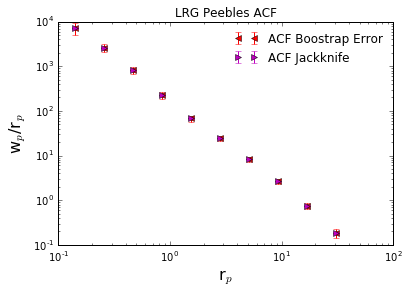

In [16]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
plt.errorbar(rp_LRGboot,wp_p_LRGboot/rp_LRGboot,yerr=wp_p_err_LRGboot/rp_LRGboot,fmt='<',color='r',label='ACF Boostrap Error')
plt.errorbar(rp_LRGjack,wp_p_LRGjack/rp_LRGjack,yerr=wp_p_err_LRGjack/rp_LRGjack,fmt='>',color='m',label='ACF Jackknife')
#http://matplotlib.org/api/markers_api.html?highlight=marker
#plt.errorbar(rp,w_p_noradec,yerr=w_p_noradec,fmt='.',color='b')
#plt.errorbar(rp,wp_p15,yerr=wp_p1_err,fmt='.',color='g')
#plt.errorbar(rp,wp_p/rp,yerr=wp_p_err/rp,fmt='.')
plt.legend(frameon=False)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$/r$_{p}$',fontsize=16)
plt.title('LRG Peebles ACF')

plt.savefig('../plots/autocorrfunctLRG.pdf')

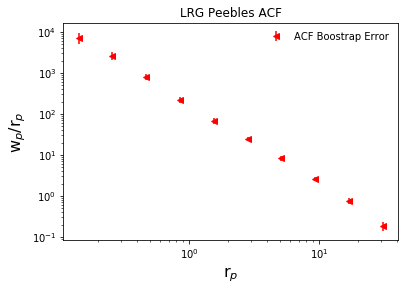

In [6]:
plt.yscale("log", nonposy='clip')
plt.xscale("log", nonposy='clip')
plt.errorbar(rp_LRGboot,wp_p_LRGboot/rp_LRGboot,yerr=wp_p_err_LRGboot/rp_LRGboot,fmt='<',color='r',label='ACF Boostrap Error')
#plt.errorbar(rp_LRGjack,wp_p_LRGjack/rp_LRGjack,yerr=wp_p_err_LRGjack/rp_LRGjack,fmt='>',color='m',label='ACF Jackknife')
#http://matplotlib.org/api/markers_api.html?highlight=marker
#plt.errorbar(rp,w_p_noradec,yerr=w_p_noradec,fmt='.',color='b')
#plt.errorbar(rp,wp_p15,yerr=wp_p1_err,fmt='.',color='g')
#plt.errorbar(rp,wp_p/rp,yerr=wp_p_err/rp,fmt='.')
plt.legend(frameon=False)
plt.xlabel('r$_{p}$',fontsize=16)
plt.ylabel('w$_{p}$/r$_{p}$',fontsize=16)
plt.title('LRG Peebles ACF')

plt.savefig('../plots/autocorrfunctLRG.pdf')